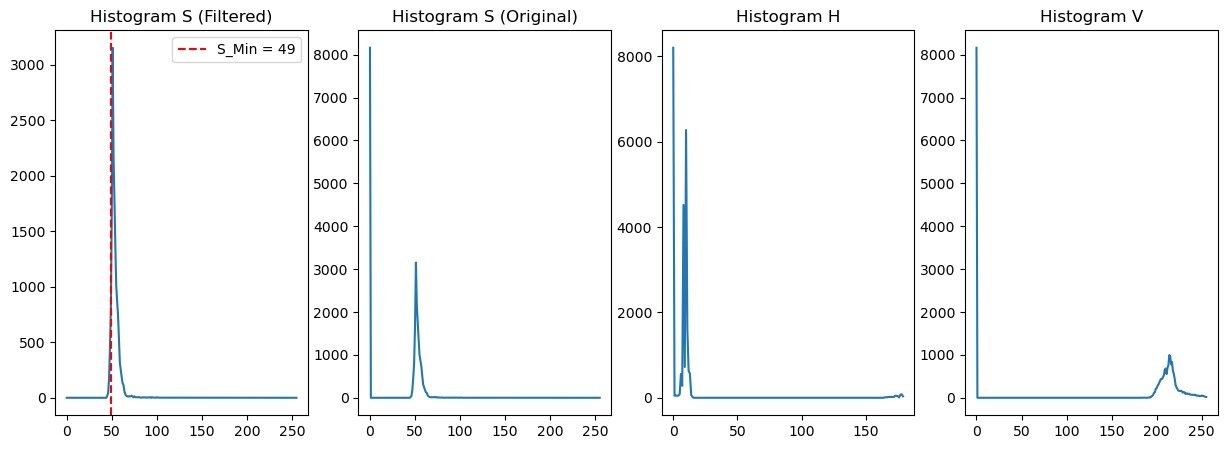

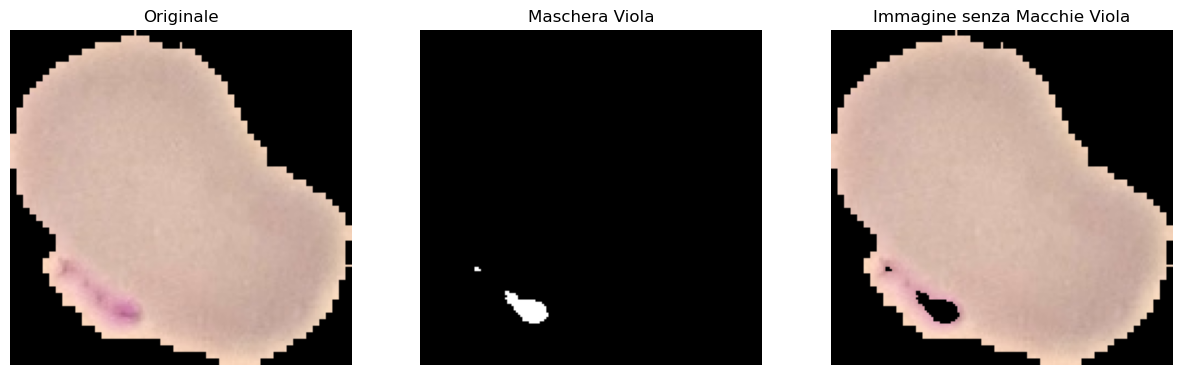

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carica l'immagine
image = cv2.imread('FESI/Progetto/malaria/malaria/parasite (4).png')  # Sostituisci con il percorso dell'immagine
original = image.copy()

# Converti l'immagine nello spazio colore HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Maschera per ignorare i pixel con saturazione 0 (sfondo)
non_zero_saturation = hsv[:, :, 1] > 0  # Mantiene solo i pixel con S > 0

# Filtra i pixel di saturazione > 0
filtered_saturation = hsv[:, :, 1][non_zero_saturation]

# Calcola l'istogramma solo sui pixel con saturazione > 0

hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 180])
hist_s_filtered = cv2.calcHist([filtered_saturation], [0], None, [256], [0, 256])
hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 256])

# Cumulativa dell'istogramma filtrato
s_values = np.arange(256)  # Valori possibili di saturazione (0-255)
cumulative_s = np.cumsum(hist_s_filtered)

# Trova il percentile ignorando i pixel con S=0
percentile_threshold = 5  # Percentile basso (5%)
total_pixels = cumulative_s[-1]
s_min = np.argmax(cumulative_s > (percentile_threshold / 100) * total_pixels)

# Visualizza l'istogramma della saturazione e la soglia s_min
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1), plt.plot(hist_s_filtered), plt.title('Histogram S (Filtered)')
plt.axvline(s_min, color='r', linestyle='--', label=f'S_Min = {s_min}')
plt.legend()
plt.subplot(1, 4, 2), plt.plot(cv2.calcHist([hsv], [1], None, [256], [0, 256])), plt.title('Histogram S (Original)')
plt.subplot(1, 4, 3), plt.plot(hist_h), plt.title('Histogram H')
plt.subplot(1, 4, 4), plt.plot(hist_v), plt.title('Histogram V')
plt.show()

# Imposta i limiti HSV dinamici
#Devo capire come associare la saturazione alla tonalità e modificarne i valori
#associare saturazione con tonalità

lower_purple = np.array([90, max(50, (s_min + 21)), 100])  # Limite inferiore (Hue, Saturation, Value)
upper_purple = np.array([185, 255, 255])  # Limite superiore

# Crea una maschera per isolare le aree viola
mask = cv2.inRange(hsv, lower_purple, upper_purple)

# Rimuovi le macchie viola dall'immagine
image[mask > 0] = [0, 0, 0]  # Sostituisce il viola con nero

# Visualizza i risultati
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axs[0].set_title('Originale')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Maschera Viola')
axs[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Immagine senza Macchie Viola')
for ax in axs:
    ax.axis('off')
plt.show()

